In [21]:
%pylab inline
import pandas as pd
import numpy as np

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Load ordered species list
species_list = [item.strip() for item in open("../TReeOfLife_OrderedSpeciesList.txt", "r").readlines()]
species_order = dict(zip(species_list, range(1, len(species_list)+1)))

# Load data and order by species order
data = pd.read_csv("TReeOfLife_SpeciesSummary.csv")
data["order"] = data["name"].apply(lambda x: species_order[x])
data = data.sort_values("order")

# Remove species we don't want. e.g. Ebola
rmspecies = ["Ebola_virus"]
data = data[~data["name"].isin(rmspecies)]

Populating the interactive namespace from numpy and matplotlib


In [7]:
data.head()

,name,per1.num,per1.perc,per2.num,per2.perc,per3.num,per3.perc,per4.num,per4.perc,per5.num,per5.perc,per6.num,per6.perc,total.num,str.bp,genome.size,str.perc.bp,str.num,str.density,order
13,Ebola_virus,0,0.000000,0,0.000000,0,0.000000,1,1.000000,0,0.000000,0,0.000000,1,12,18957,0.000633,1,0.000053,1
3,Caenorhabditis_brenneri,4903,0.069721,10864,0.154487,28992,0.412269,17912,0.254710,6064,0.086231,1588,0.022582,70323,1076599,194283334,0.005541,72763,0.000375,2
4,Caenorhabditis_elegans,5246,0.111236,7869,0.166854,14406,0.305464,14431,0.305994,3177,0.067365,2032,0.043086,47161,774440,100286401,0.007722,50503,0.000504,3
5,Caenorhabditis_japonica,13218,0.150502,8818,0.100403,19496,0.221984,28682,0.326578,12280,0.139822,5332,0.060711,87826,1379819,156378573,0.008824,91702,0.000586,4
6,Caenorhabditis_remanei,2379,0.041580,8222,0.143704,21416,0.374307,16114,0.281639,7516,0.131364,1568,0.027405,57215,961867,149111736,0.006451,63615,0.000427,5


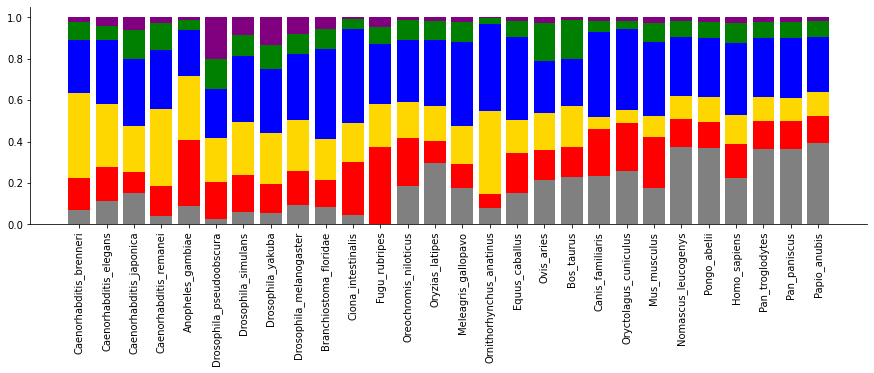

In [22]:
# Plot repeat percentages

fig = plt.figure()
fig.set_size_inches((15, 4))
ax = fig.add_subplot(111)

bottoms = np.array([0]*data.shape[0])

percolors = ["gray","red","gold","blue","green","purple"]

for period in range(1, 7):
    values = np.array(data["per%s.perc"%period])
    ax.bar(range(len(values)), values, color=percolors[period-1], bottom=bottoms)
    bottoms = bottoms+values
    
ax.set_xticks(range(len(bottoms)))
ax.set_xticklabels(data["name"], rotation=90);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig("TRSpecies_PeriodPercs.pdf")

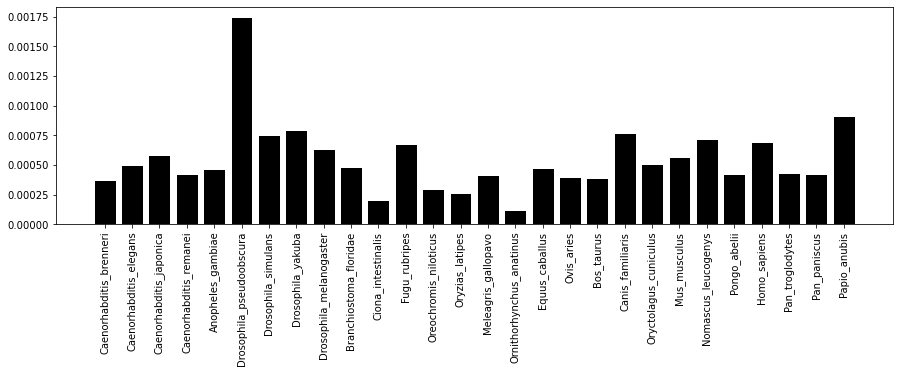

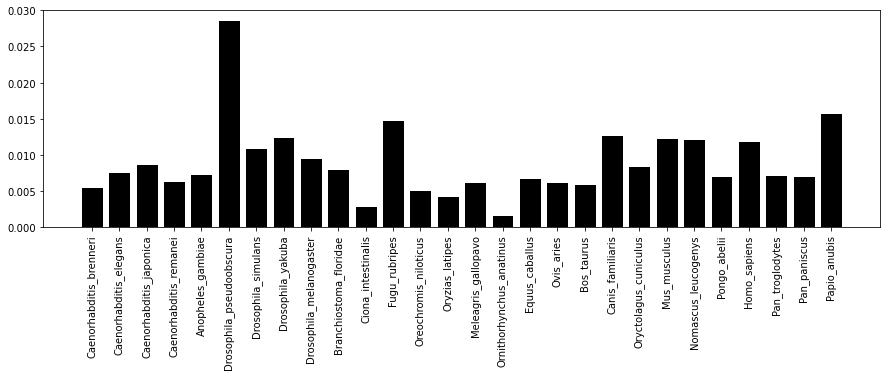

In [27]:
# Plot repeat density

fig = plt.figure()
fig.set_size_inches((15, 4))
ax = fig.add_subplot(111)
ax.bar(range(data.shape[0]), data["str.density"], color="black", edgecolor="white");
ax.set_xticks(range(data.shape[0]))
ax.set_xticklabels(data["name"], rotation=90);
fig.savefig("TRSpecies_Density.pdf")

fig = plt.figure()
fig.set_size_inches((15, 4))
ax = fig.add_subplot(111)
ax.bar(range(data.shape[0]), data["str.perc.bp"], color="black", edgecolor="white");
ax.set_xticks(range(data.shape[0]))
ax.set_xticklabels(data["name"], rotation=90);
fig.savefig("TRSpecies_GenomePerc.pdf")